## Building a dataframe from the Kaggle dataset

In [1]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

In [2]:
# Read in the csv file from Kaggle
movies_kaggle = pd.read_csv('MoviesOnStreamingPlatforms.csv', sep=',', encoding='utf-8')

In [3]:
display(movies_kaggle.head())

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [7]:
movies_kaggle = movies_kaggle.drop(columns=['Unnamed: 0','Type','Age'])

In [9]:
# Rename columns to snake case
movies_kaggle.rename(columns = {'ID':'id', 'Title':'title', 'Year':'year', 'Rotten Tomatoes':'rotten_tomatoes', 'Netflix':'netflix', 'Hulu':'hulu',
                               'Prime Video':'prime_video', 'Disney+':'disney_plus'}, inplace=True)

In [11]:
# Check the data types
print(movies_kaggle.dtypes)

id                  int64
title              object
year                int64
rotten_tomatoes    object
netflix             int64
hulu                int64
prime_video         int64
disney_plus         int64
dtype: object


In [13]:
# Convert the column data types
movies_kaggle['year'] = pd.to_datetime(movies_kaggle['year'], errors='coerce', format='%Y')
movies_kaggle['netflix'].astype('category')
movies_kaggle['hulu'].astype('category')
movies_kaggle['prime_video'].astype('category')
movies_kaggle['disney_plus'].astype('category')
print(movies_kaggle.dtypes)

id                          int64
title                      object
year               datetime64[ns]
rotten_tomatoes            object
netflix                     int64
hulu                        int64
prime_video                 int64
disney_plus                 int64
dtype: object


## Import data from IMDb scrape

In [16]:
# Read in the scraped csv file from IMDb
movies_imdb = pd.read_csv('raw_imdb_53.csv', sep=',', encoding='utf-8')

In [18]:
display(movies_imdb.head())

,title,year,imdb_ratings
0,1. Oh My Darling,2021,5.8
1,2. Blueberry,2021,6.0
2,3. H.P. Lovecraft's Witch House,2021,2.6
3,4. Malibu Road,2021,4.5
4,5. Apache Leap,2021,NaN


In [20]:
# Remove the number before the movie title in the dataframe 
movies_imdb['title'] = movies_imdb['title'].str.replace(r'^\d+\.\s*', '', regex=True)

# View to see if it worked 
display(movies_imdb.head())

,title,year,imdb_ratings
0,Oh My Darling,2021,5.8
1,Blueberry,2021,6.0
2,H.P. Lovecraft's Witch House,2021,2.6
3,Malibu Road,2021,4.5
4,Apache Leap,2021,NaN


## Merge the data

In [23]:
# Make sure the column names are the same
print(movies_imdb.columns)
print(movies_kaggle.columns)

Index(['title', 'year', 'imdb_ratings'], dtype='object')
Index(['id', 'title', 'year', 'rotten_tomatoes', 'netflix', 'hulu',
       'prime_video', 'disney_plus'],
      dtype='object')


In [25]:
# Make sure the datatypes are the same
print(movies_kaggle.loc[:,['title','year']].dtypes)
print(movies_imdb.loc[:,['title','year']].dtypes)

title            object
year     datetime64[ns]
dtype: object
title    object
year     object
dtype: object


In [27]:
# Convert year to datetime
movies_imdb['year'] = pd.to_datetime(movies_imdb['year'], errors='coerce', format='%Y')

# Check again
print(movies_kaggle.loc[:,['title','year']].dtypes)
print(movies_imdb.loc[:,['title','year']].dtypes)

title            object
year     datetime64[ns]
dtype: object
title            object
year     datetime64[ns]
dtype: object


In [29]:
# Merge the two dataframes
merged_movies = pd.merge(movies_imdb, movies_kaggle, on=['title', 'year'], how='inner')

# View to see how much is overlapping 
display(merged_movies)

,title,year,imdb_ratings,id,rotten_tomatoes,netflix,hulu,prime_video,disney_plus
0,The Lift,2021-01-01,NaN,6699,48/100,0,0,1,0
1,Resort to Love,2021-01-01,5.7,2828,44/100,1,0,0,0
2,Hostage House,2021-01-01,3.9,2740,45/100,1,0,0,0
3,Blood Red Sky,2021-01-01,6.1,735,66/100,1,0,0,0
4,Trollhunters: Rise of the Titans,2021-01-01,6.6,581,69/100,1,0,0,0
...,...,...,...,...,...,...,...,...,...
478,The Blackout,2019-01-01,5.3,5096,66/100,0,0,1,0
479,The Addams Family,2019-01-01,5.8,3952,68/100,0,1,0,0
480,Earthquake Bird,2019-01-01,6.0,1128,61/100,1,0,0,0
481,Trick,2019-01-01,4.9,4421,53/100,0,1,0,0


### 1. Which streaming platform has the most popular movies? (Top 25% of IMDb ratings and Rotten Tomatoes score that is greater than or equal to 60%). 

In [32]:
#turn rotten_tomatoes into a single number based on the score out of 100
merged_movies['rotten_tomatoes_percentage'] = (
    merged_movies['rotten_tomatoes']
    .str.split('/')             
    .apply(lambda x: int(x[0]) / int(x[1]) * 100))
display(merged_movies)

,title,year,imdb_ratings,id,rotten_tomatoes,netflix,hulu,prime_video,disney_plus,rotten_tomatoes_percentage
0,The Lift,2021-01-01,NaN,6699,48/100,0,0,1,0,48.0
1,Resort to Love,2021-01-01,5.7,2828,44/100,1,0,0,0,44.0
2,Hostage House,2021-01-01,3.9,2740,45/100,1,0,0,0,45.0
3,Blood Red Sky,2021-01-01,6.1,735,66/100,1,0,0,0,66.0
4,Trollhunters: Rise of the Titans,2021-01-01,6.6,581,69/100,1,0,0,0,69.0
...,...,...,...,...,...,...,...,...,...,...
478,The Blackout,2019-01-01,5.3,5096,66/100,0,0,1,0,66.0
479,The Addams Family,2019-01-01,5.8,3952,68/100,0,1,0,0,68.0
480,Earthquake Bird,2019-01-01,6.0,1128,61/100,1,0,0,0,61.0
481,Trick,2019-01-01,4.9,4421,53/100,0,1,0,0,53.0


In [34]:
#drop original rotten_tomatoes column
merged_movies.drop(columns=['rotten_tomatoes'])

#reorder the columns to fit original dataset
new_order = ['title', 'year', 'imdb_ratings', 'id', 'rotten_tomatoes_percentage', 'netflix', 'hulu', 
'prime_video', 'disney_plus']
merged_movies = merged_movies[new_order]
display(merged_movies)

,title,year,imdb_ratings,id,rotten_tomatoes_percentage,netflix,hulu,prime_video,disney_plus
0,The Lift,2021-01-01,NaN,6699,48.0,0,0,1,0
1,Resort to Love,2021-01-01,5.7,2828,44.0,1,0,0,0
2,Hostage House,2021-01-01,3.9,2740,45.0,1,0,0,0
3,Blood Red Sky,2021-01-01,6.1,735,66.0,1,0,0,0
4,Trollhunters: Rise of the Titans,2021-01-01,6.6,581,69.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
478,The Blackout,2019-01-01,5.3,5096,66.0,0,0,1,0
479,The Addams Family,2019-01-01,5.8,3952,68.0,0,1,0,0
480,Earthquake Bird,2019-01-01,6.0,1128,61.0,1,0,0,0
481,Trick,2019-01-01,4.9,4421,53.0,0,1,0,0


In [36]:
#fill NaN with 0 to be able to calculate averages
merged_movies['imdb_ratings'] = merged_movies['imdb_ratings'].fillna(0)

In [38]:
#calculate the cutoff for the top 25% of IMDb scores
top_25_percent = merged_movies['imdb_ratings'].quantile(0.75)
print(top_25_percent)

6.6


In [40]:
#return all movies on each streaming service that meet the criteria of Rotten Tomatoes score greater than or equal to 60% and IMDb is in the top 25%

#netflix
popular_netflix = merged_movies[
    (merged_movies['rotten_tomatoes_percentage'] >= 60.0) &
    (merged_movies['imdb_ratings'] >= 6.6) &
    (merged_movies['netflix'] == 1)]

#hulu
popular_hulu = merged_movies[
    (merged_movies['rotten_tomatoes_percentage'] >= 60.0) &
    (merged_movies['imdb_ratings'] >= 6.6) &
    (merged_movies['hulu'] == 1)]

#prime video
popular_prime = merged_movies[
    (merged_movies['rotten_tomatoes_percentage'] >= 60.0) &
    (merged_movies['imdb_ratings'] >= 6.6) &
    (merged_movies['prime_video'] == 1)]

#disney+
popular_disney = merged_movies[
    (merged_movies['rotten_tomatoes_percentage'] >= 60.0) &
    (merged_movies['imdb_ratings'] >= 6.6) &
    (merged_movies['disney_plus'] == 1)]

#print the number of movies meeting the popularity criteria for each service
print(f"Popular movies on Netflix: {len(popular_netflix)}")
print(f"Popular movies on Hulu: {len(popular_hulu)}")
print(f"Popular movies on Prime Video: {len(popular_prime)}")
print(f"Popular movies on Disney+: {len(popular_disney)}")

Popular movies on Netflix: 38
Popular movies on Hulu: 12
Popular movies on Prime Video: 11
Popular movies on Disney+: 11


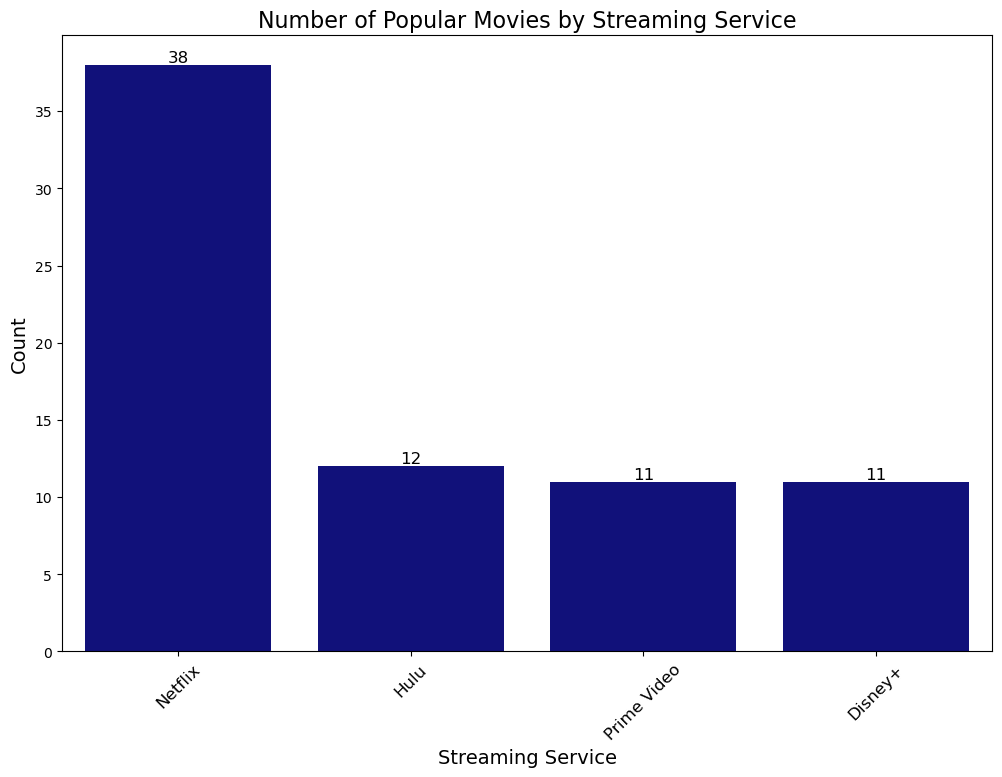

In [119]:
# Create a DataFrame for services and their counts
data = pd.DataFrame({
    'Service': ['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'Count': [
        len(popular_netflix),
        len(popular_hulu),
        len(popular_prime),
        len(popular_disney)
    ]
})

# Sort the DataFrame by 'Count' in descending order
data = data.sort_values(by='Count', ascending=False)

# Create the ordered bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Service', y='Count', data=data, order=data['Service'], color="darkblue")

# Add title and labels
plt.title("Number of Popular Movies by Streaming Service", fontsize=16)
plt.xlabel("Streaming Service", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()


## 2. How does each streaming service’s average IMDb rating and Rotten Tomatoes score compared to the overall average of all movies released between 2019-2021? 

### IMDb Means

In [98]:
#overall mean
imdb_mean = merged_movies['imdb_ratings'].mean()
print(f"Overall IMDb Mean: {round(imdb_mean, 2)}")

#netflix mean
netflix_movies = merged_movies[merged_movies['netflix'] == 1]
netflix_imdb_mean = netflix_movies['imdb_ratings'].mean()
print(f"Netflix IMDb Mean: {round(netflix_imdb_mean, 2)}")

#hulu mean
hulu_movies = merged_movies[merged_movies['hulu'] == 1]
hulu_imdb_mean = hulu_movies['imdb_ratings'].mean()
print(f"Hulu IMDb Mean: {round(hulu_imdb_mean, 2)}")

#prime video mean
prime_movies = merged_movies[merged_movies['prime_video'] == 1]
prime_imdb_mean = prime_movies['imdb_ratings'].mean()
print(f"Prime Video IMDb Mean: {round(prime_imdb_mean, 2)}")

#disney+ mean
disney_movies = merged_movies[merged_movies['disney_plus'] == 1]
disney_imdb_mean = disney_movies['imdb_ratings'].mean()
print(f"Disney+ IMDb Mean: {round(disney_imdb_mean, 2)}")

Overall IMDb Mean: 5.64
Netflix IMDb Mean: 5.83
Hulu IMDb Mean: 5.61
Prime Video IMDb Mean: 5.16
Disney+ IMDb Mean: 6.72


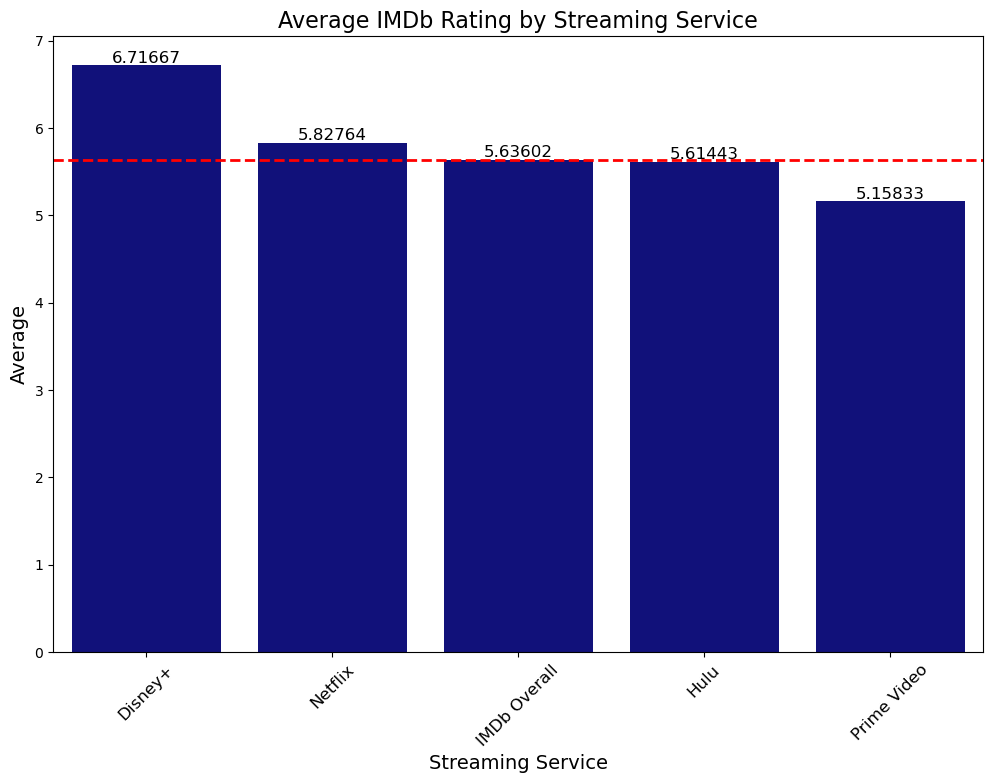

In [125]:
# Create a DataFrame for services and their counts
data = pd.DataFrame({
    'Service': ['IMDb Overall', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'Average': [
        imdb_mean,
        netflix_imdb_mean,
        hulu_imdb_mean,
        prime_imdb_mean,
        disney_imdb_mean
    ]
})

# Sort the DataFrame by 'Count' in descending order
data = data.sort_values(by='Average', ascending=False)

# Create the ordered bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Service', y='Average', data=data, order=data['Service'], color="darkblue")

# Add the horizontal line for 'IMDb Overall' average
overall_average = imdb_mean  # Assuming imdb_mean is defined
plt.axhline(y=overall_average, color='red', linestyle='--', linewidth=2, label='Overall Average')

# Add title and labels
plt.title("Average IMDb Rating by Streaming Service", fontsize=16)
plt.xlabel("Streaming Service", fontsize=14)
plt.ylabel("Average", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()


### Rotten Tomatoes Means

In [101]:
#overall mean
rotten_tomatoes_mean = merged_movies['rotten_tomatoes_percentage'].mean()
print(f"Overall Rotten Tomatoes Mean: {round(rotten_tomatoes_mean, 2)}")

#netflix mean
netflix_movies_rt = merged_movies[merged_movies['netflix'] == 1]
netflix_rt_mean = netflix_movies_rt['rotten_tomatoes_percentage'].mean()
print(f"Netflix Rotten Tomatoes Mean: {round(netflix_rt_mean, 2)}")

#hulu mean
hulu_movies_rt = merged_movies[merged_movies['hulu'] == 1]
hulu_rt_mean = hulu_movies_rt['rotten_tomatoes_percentage'].mean()
print(f"Hulu Rotten Tomatoes Mean: {round(hulu_rt_mean, 2)}")

#prime video mean
prime_movies_rt = merged_movies[merged_movies['prime_video'] == 1]
prime_rt_mean = prime_movies_rt['rotten_tomatoes_percentage'].mean()
print(f"Prime Video Rotten Tomatoes Mean: {round(prime_rt_mean, 2)}")

#disney+ mean
disney_movies_rt = merged_movies[merged_movies['disney_plus'] == 1]
disney_rt_mean = disney_movies_rt['rotten_tomatoes_percentage'].mean()
print(f"Disney+ Rotten Tomatoes Mean: {round(disney_rt_mean, 2)}")

Overall Rotten Tomatoes Mean: 56.17
Netflix Rotten Tomatoes Mean: 60.12
Hulu Rotten Tomatoes Mean: 57.85
Prime Video Rotten Tomatoes Mean: 49.06
Disney+ Rotten Tomatoes Mean: 60.36


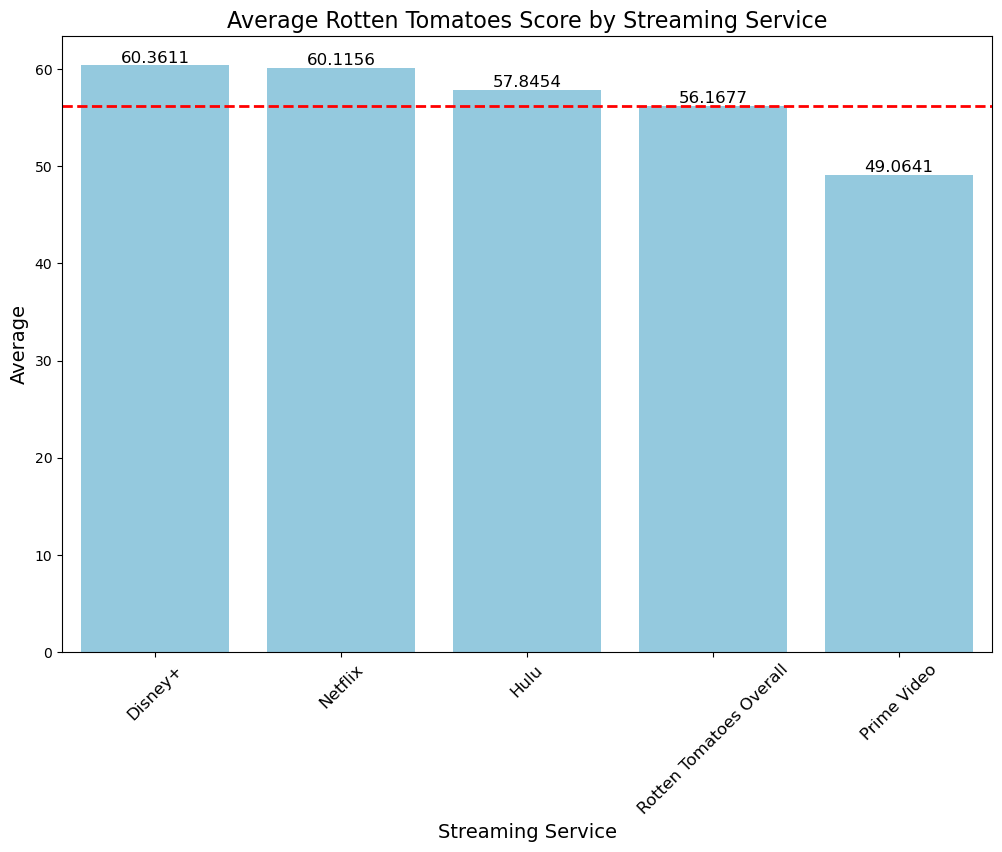

In [147]:
# Create a DataFrame for services and their counts
data = pd.DataFrame({
    'Service': ['Rotten Tomatoes Overall', 'Netflix', 'Hulu', 'Prime Video', 'Disney+'],
    'Average': [
        rotten_tomatoes_mean,
        netflix_rt_mean,
        hulu_rt_mean,
        prime_rt_mean,
        disney_rt_mean
    ]
})

# Sort the DataFrame by 'Count' in descending order
data = data.sort_values(by='Average', ascending=False)

# Create the ordered bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Service', y='Average', data=data, order=data['Service'], color="skyblue")

# Add the horizontal line for 'Rotten Tomatoes Overall' average
overall_average = rotten_tomatoes_mean  
plt.axhline(y=overall_average, color='red', linestyle='--', linewidth=2, label='Overall Average')

# Add title and labels
plt.title("Average Rotten Tomatoes Score by Streaming Service", fontsize=16)
plt.xlabel("Streaming Service", fontsize=14)
plt.ylabel("Average", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.show()


## 3. How many movies are available on multiple platforms, and which platforms overlap the most? 

In [ ]:
movies_kaggle['platform_count'] = movies_kaggle[['netflix','hulu', 'prime_video', 'disney_plus']].sum(axis=1)
display(movies_kaggle)

In [ ]:
# Finding movies where platform count is greater than 1 
multi_platforms = movies_kaggle[movies_kaggle['platform_count']>1]
# Count the number of movies that are available on multiple platforms
multi_platforms_count = len(multi_platforms)
print(f"There are {multi_platforms_count} movies that are available on multiple streaming platforms.")


In [ ]:
# Counting the number of overlaps for each combination of streaming platforms 
netflix_hulu = ((movies_kaggle['netflix']==1) & (movies_kaggle['hulu']==1)).sum()
netflix_prime = ((movies_kaggle['netflix']==1) & (movies_kaggle['prime_video']==1)).sum()
netflix_disney = ((movies_kaggle['netflix']==1) & (movies_kaggle['disney_plus']==1)).sum()
hulu_prime = ((movies_kaggle['hulu']==1) & (movies_kaggle['prime_video']==1)).sum()
hulu_disney = ((movies_kaggle['hulu']==1) & (movies_kaggle['disney_plus']==1)).sum()
prime_disney = ((movies_kaggle['prime_video']==1) & (movies_kaggle['disney_plus']==1)).sum()

In [ ]:
# Find the maximum overlap count
max_overlap = max(netflix_hulu, netflix_prime, netflix_disney, hulu_prime, hulu_disney, prime_disney)

In [ ]:
# Find which pair has the maximum overlap
if max_overlap == netflix_hulu:
    max_pair = 'netflix_hulu'
elif max_overlap == netflix_prime:
    max_pair = 'netflix_prime'
elif max_overlap == netflix_disney:
    max_pair = 'netflix_disney'
elif max_overlap == hulu_prime:
    max_pair = 'hulu_prime'
elif max_overlap == hulu_disney:
    max_pair = 'hulu_disney'
else:
    max_pair = 'prime_disney'

# The result 
print(f"The platform pair with the most overlap (highest number of movies available on both platforms) is {max_pair.replace('_', ' and ')} with {max_overlap} movies overlapping.") 

## 4. How many movies were added to each platform in each release year?

In [ ]:
# Extract year as an integer directly
merged_movies['year'] = pd.to_datetime(merged_movies['year'], errors='coerce').dt.year
display(merged_movies)